<img src="https://raw.githubusercontent.com/flatiron-school/Online-DS-FT-022221-Cohort-Notes/master/Phase_5/tableau/images/tableau_cmyk_2015.png" width=50%>

# Tableau Fundamentals

## Topics
- Tableau vs Tableau Public
- Installing Tableau Public
- Loading Data Files 
- Key Vocabulary
- Making Several Types of Plots
    - Scatter Plots with Trendlines
    - Histograms/Grouped Histogram
    - Map scatter plot 
    - Map Shaded Area Plot
- Customizing Plots
- Your Tableau Profile

## Tableau vs Tableau Public

- Tableau Public is the free version of Tableau.
- They are VERY similar, but there are important distinctions:
    - Data Access
        - Tableau can access SQL servers
        - Tableau Public cannot.
    - Saving Projects:
        - Tableau can save and load projects locally.
        - Tableau Public can only save to the cloud
        
## Installing Tableau Public

- https://public.tableau.com/en-us/s/

## Loading Data

- Tableau Public can load data from many file types:
    - Excel
    - Text Files (csv,tsv)
    - JSON Files
    - Google Sheets
    - etc.
    
- We will download the 2 csv's we will be using into this repo's folder.

## Basic Tableau Terminology

- Dimensions: 
    - categorical features/independent variables
    - Show up in Blue on Columns/Row view

- Measures: 
    - numeric features / dependent variables.
    - Measures get aggregated (SUM, MEAN,etc)
    - Shows up in Green on Columns/Row View

- Attributes
    - ??? (surprisingly hard to find a definition)
    - See [this blog post](http://paintbynumbersblog.blogspot.com/2013/04/a-handy-use-of-attributes-in-tableau.html) for an example of when you'd want to make something an Attribute.

## King's County Tasks

### Load in "kings_county_data.csv"

- Open Tableau Public and load up the first housing regression dataset file (`regression_data_details.csv`)
    - CSVs are technically "Text Files"   

- Notice that Tableau automatically replaced text values in numeric columns ('?' in sqft)
    - It also cleaned up the column names (`sqft_living` -> "Sqft Living")
  
- Now click "Go to Worksheet" / "Sheet 1" at the bottom of the app.

In [2]:
# Import Python Packages
# !pip install -U kaleido
import kaleido

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

import plotly.express as px
import plotly.io as pio
px.defaults.width = 700
px.defaults.height = 500

plt.style.use(['seaborn-talk','dark_background',])
# pio.templates.default='plotly_dark'

In [3]:
# Import data and export to csv file
king = pd.read_csv('data/kings_county_data.csv')
display(king.head(2))


id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  

[2 rows x 21 columns]

In [4]:
# Additional setup for Python figs
king.rename({'long':'lon'},axis=1,inplace=True)
king['waterfront'] = king['waterfront'].astype(str)
king.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  lon   

### Plots to Make: King's County Housing Data

1. [ ] A scatter plot of Sqft Living vs Price + a trendline.
2. [ ] A scatter plot of Sqft Living vs Price grouped by if its waterfront property (+ trendlines) <br><t>(first with null values then without)
3. [ ] A histogram of price in in **\$**100K-bins.
4. [ ] A histogram of price in in **\$**100K-bins broken out by Waterfront properties.
5. [ ] A map of median prices by zipcode (with a Green color scale broken into 5 shades of green)- see note about maps below.
6. [ ] A map of all homes with color-coded price with the smallest markers possible. 

    
> - **Note: for our maps, we want:**
    - A dark background,
    - Add County names/borders
    - Add major cities
    - Add terrain
    - Add major roadways. 

    
- [ ] **Save the workbook to Tableau Public and make sure it shows all individual sheets.**

#### A scatter plot of Sqft Living vs Price + a trendline

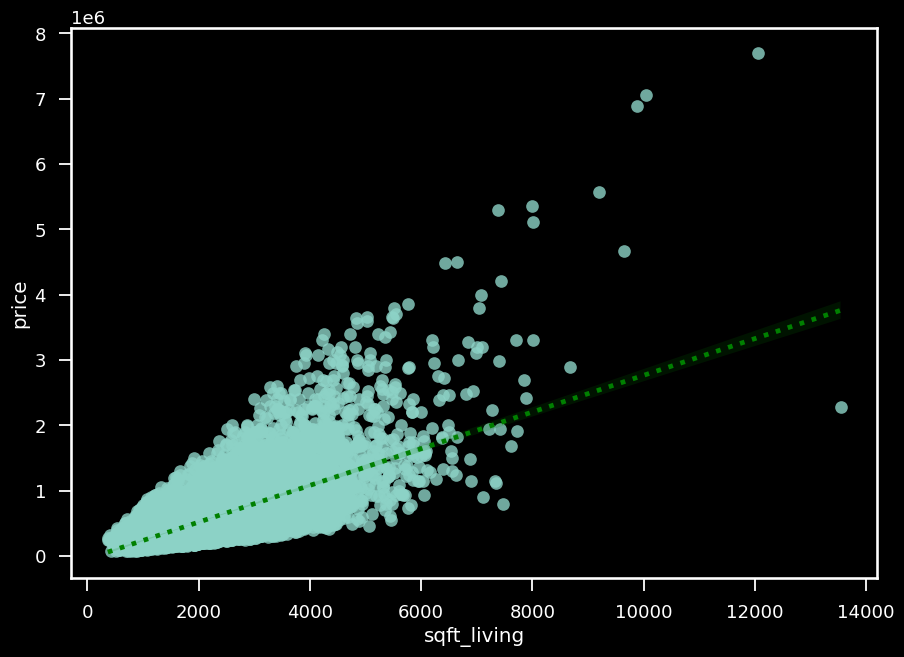

In [5]:
# Python Answer - Seaborn
sns.regplot(data=king, x='sqft_living',y='price',
            line_kws={'color':'green',"ls":':'});

In [6]:
# Python Answer - Plotly
px.scatter(king, x='sqft_living',y='price',trendline='ols',
           trendline_color_override='green')

Tableau Answer:
- Columns = Sqft Living (Dimension)
- Rows = Price (Dimension)
- Change to Analysis Tab -> Trendline


#### A scatter plot of Sqft Living vs Price grouped by if its waterfront property (+ trendlines) 
- (first with null values then without)

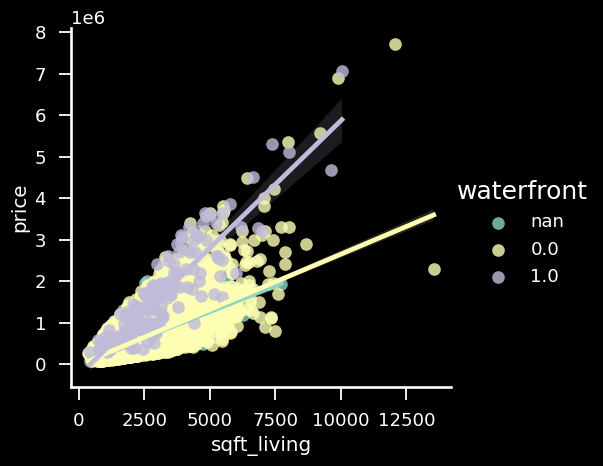

In [14]:
# Python Answer - Seaborn
sns.lmplot(data=king, x='sqft_living',y='price',hue='waterfront');

In [7]:
# Python Answer - Plotly
px.scatter(king, x='sqft_living',y='price',color='waterfront',trendline='ols',
           trendline_color_override='green')

Tableau Answer:

- Duplicate sheet/plot #1
- Right Click Waterfront -> Convert to Dimension
- Drag Waterfront -> Color
    
- To remove Null values:
    - Right click on Null in legend > Exclude
        

#### A histogram of price in $100K-bins

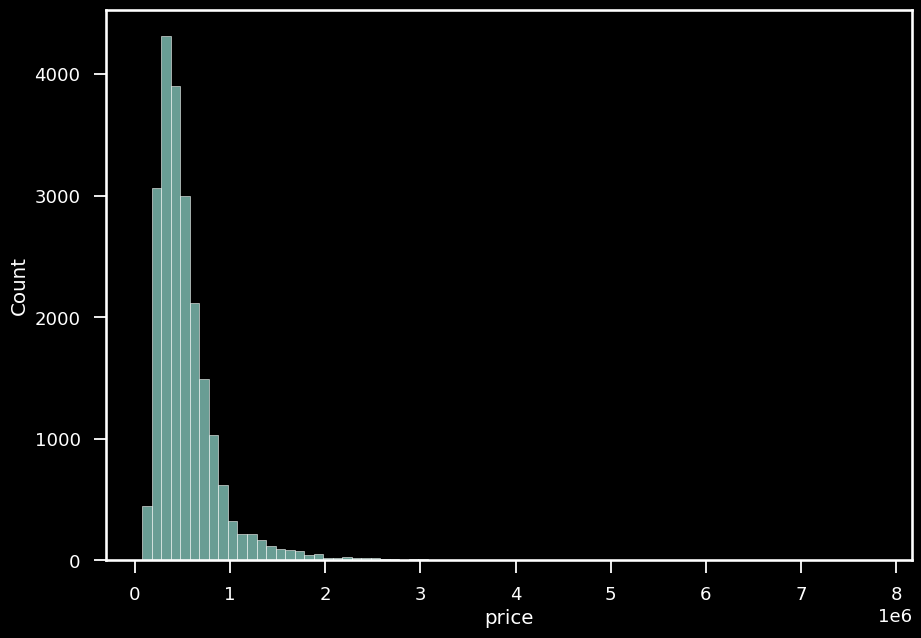

In [16]:
# Python Answer - Seaborn
sns.histplot(king,x='price',binwidth=100_000);

In [8]:
# Python Answer - Plotly

# must calculate n_bins
n_bins=77
king['price'].max()/n_bins
px.histogram(king,x='price',nbins=n_bins,width=800)

Tableau Answer:
    
Solution 1:
- Click Price then click Show Me > select histogram

Solution 2:
- Right click on Price > Create > Bins
- Columns = Price Bins
- Rows = Price(CNT)

#### A histogram of price in in $100K-bins - by Waterfront

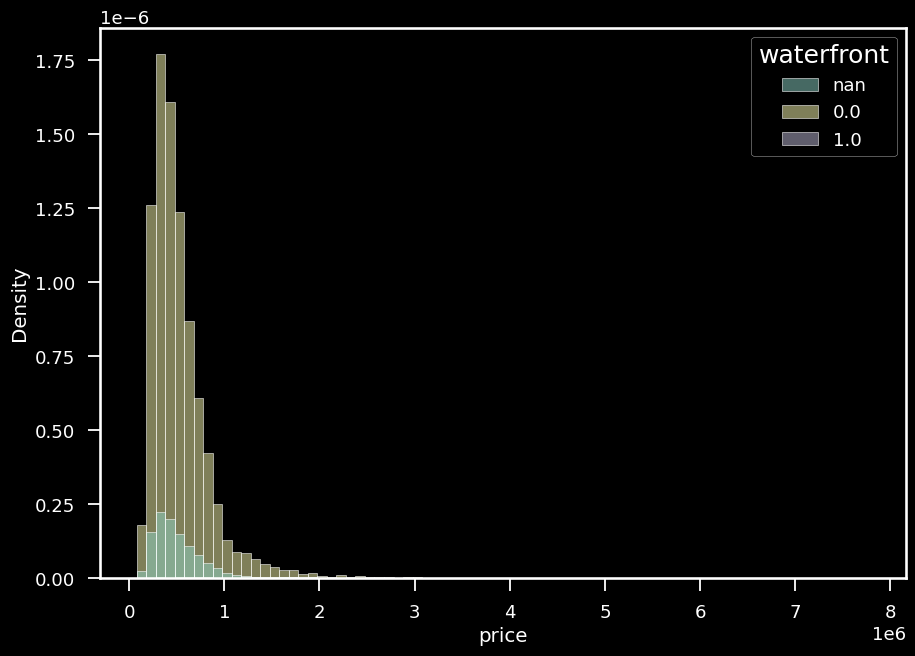

In [17]:
# Python Answer - Seaborn
sns.histplot(king, x='price', binwidth=100_000,
             hue='waterfront', stat='density');

In [9]:
# Python Answer - Plotly
px.histogram(king,x='price',color='waterfront',nbins=n_bins,
             width=800,barmode='overlay')

Tableau Answer
- Duplicate plot #3
- Drag Waterfront dimension to Color

#### A map of median prices by zipcode (with a Green color scale broken into 5 shades of green)- see note about maps below.

    
- **Note: for our maps, we want:**
    - A dark background,
    - Add County names/borders
    - Add major cities
    - Add terrain
    - Add major roadways. 

Python Answer - Plotly

- Not easily implementable without downloading [King County zipcode geojson file.](https://opendata.arcgis.com/datasets/e6c555c6ae7542b2bdec92485892b6e6_113.geojson)

In [10]:
import requests,json
url ='https://opendata.arcgis.com/datasets/e6c555c6ae7542b2bdec92485892b6e6_113.geojson'
content = requests.get(url).json()
content.keys()

dict_keys(['type', 'name', 'crs', 'features'])

In [11]:
zipcodes_df = pd.read_csv('data/zipcodes.csv')

In [12]:
# Took a public data file containing the shapes of zipcodes in King County using latitude/longitude coordinates
# geojson file source: https://data.seattle.gov/dataset/Zip-Codes/dk58-w4ct

# Parsed just the zipcodes in our source dataset from the public geojson file 
# into an updated json with just the necessary data for mapping
# inspiration from: https://towardsdatascience.com/visualizing-data-at-the-zip-code-level-with-folium-d07ac983db20

import json
with open('data/kc_zipcode_map.geojson', 'r') as jsonFile:
    kczipcodes = json.load(jsonFile)

geozips = []
for i in range(len(kczipcodes['features'])):
    if kczipcodes['features'][i]['properties']['ZIP'] in list(zipcodes_df['zipcode'].unique()):
        geozips.append(kczipcodes['features'][i])

new_json = dict.fromkeys(['type', 'features'])
new_json['type'] = 'FeatureCollection'
new_json['features'] = geozips

open('data/updated_kc_zipcode_map.json', 'w').write(
        json.dumps(new_json, sort_keys=True, indent=4, separators=(',', ': ')));

In [13]:
# Checking the format of the new json file to find what I can map to the zipcodes_df
with open('data/updated_kc_zipcode_map.json', 'r') as f:
    kc_geojson = json.load(f)
#kc_geojson['features'][0]

In [14]:
# Create a string column with formatted price to put in visualization
zipcodes_df['$price'] = zipcodes_df['price'].apply(lambda x: '${:,}'.format(x))

In [15]:
def zipcodes_map(df, color, hoverdata=None, title=None, labels=None):
    '''
    Parameters:
    df - pd.Dataframe, main data to read
    color - str, column name in df to visualize
    hoverdata - list, column names to display on map
    labels - optional dict, {hoverdata: display name} to display more intuitive names
    title - optional str, title for map
    
    Returns:
    Choropleth map
    '''
    fig = px.choropleth_mapbox(data_frame=df, locations='zipcode', center={'lat': 47.47, 'lon': -121.84}, 
                               color=color, color_continuous_scale='dense',
                               geojson=kc_geojson, featureidkey='properties.ZIP', 
                               hover_data=hoverdata, labels=labels,
                               title=title, height=700, width=900, opacity=.7)
    fig.update_layout(mapbox_style='carto-positron')
    fig.update_geos(fitbounds='locations', visible=False)
    fig.write_image((f'images/zipmap_{color}.png'))
    fig.show()

In [1]:
hoverdata = ['$price', 'sqft_living', 'sqft_lot', 'yr_built']
labels = {'$price': 'Sale Price', 'sqft_living': 'Living Space (sqft)', 
          'sqft_lot': 'Lot Size (sqft)', 'yr_built': 'Year Built',
         'price': 'Sale Price ($)'}
mean_title = 'Average House Sale Price($), King County'
zipcodes_map(zipcodes_df, 'price', hoverdata=hoverdata, title=mean_title, labels=labels)

NameError: name 'zipcodes_map' is not defined

Tableau Answer
- Drag Zipcode onto main pane of plot.
    - Drag Price onto Color
        - Change Price to Median
    - Click on Dropdown Arrow next to Title of Color Scale:
        - Edit Colors
        - Select Green
        - Select Stepped Color
    - Visual Flair: 
        - Right Click on Map > Map Layers
        - Select Dark
        - Add County borders, county labels, terrain, cities.

#### A map of all homes with color-coded price with the smallest markers possible. 

In [ ]:
# Python Answer - Plotly
px.scatter_mapbox(king, lat='lat',lon='lon',color='price',mapbox_style='carto-darkmatter',
                  color_continuous_scale='greens', )

Tableau Answer
- Columns: Long
- Rows: Lat
- Color: Price
- Click on Size > Drag slider to the left.

### **Save the workbook to Tableau Public and make sure it shows all individual sheets.**

Tableau Sheets

Sheet 1: https://public.tableau.com/app/profile/justin.san.andres/viz/DS311_Tableau_Lab_Excersize_Sheet1_SanAndres/Sheet1

Sheet 2: https://public.tableau.com/app/profile/justin.san.andres/viz/DS311_Tableau_Lab_Excersize_Sheet2_SanAndres/Sheet2

Sheet 3: https://public.tableau.com/app/profile/justin.san.andres/viz/DS311_Tableau_Lab_Excersize_Sheet3_SanAndres/Sheet3

Sheet 4: https://public.tableau.com/app/profile/justin.san.andres/viz/DS311_Tableau_Lab_Excersize_Sheet4_SanAndres/Sheet4

Sheet 5: https://public.tableau.com/app/profile/justin.san.andres/viz/DS311_Tableau_Lab_Excersize_Sheet5_SanAndres/Sheet5